# linear reg

### import lib

In [1233]:
pip install missingno


In [1234]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical and Visualization Libraries
from scipy import stats
import missingno as msno  # For missing data visualization

# Machine Learning and Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score  # For calculating R^2
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, RFE
from scipy.stats import shapiro, probplot


### read data

In [1235]:
df = pd.read_csv('/content/20to22NYC.csv').dropna(how="all").drop_duplicates()
df.head()

<ipython-input-1235-a3691a5d5744>:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/20to22NYC.csv').dropna(how="all").drop_duplicates()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [1236]:
df.columns[10:13]

Index(['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'], dtype='object')

In [1237]:
df.columns=[col.lower() for col in df.columns]

In [1238]:
df.columns[10:13]

Index(['residential units', 'commercial units', 'total units'], dtype='object')

In [1239]:
df['residential units']=pd.to_numeric(df['residential units'],errors='coerce')
df['commercial units']=pd.to_numeric(df['commercial units'],errors='coerce')
df['total units']=pd.to_numeric(df['total units'],errors='coerce')

In [1240]:
df=df[df['sale price']!=0]

In [1241]:
df.duplicated().sum()

0

In [1242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183565 entries, 1 to 258461
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   borough                         183565 non-null  int64  
 1   neighborhood                    183565 non-null  object 
 2   building class category         183565 non-null  object 
 3   tax class at present            183253 non-null  object 
 4   block                           183565 non-null  int64  
 5   lot                             183565 non-null  int64  
 6   building class at present       183253 non-null  object 
 7   address                         183565 non-null  object 
 8   apartment number                50256 non-null   object 
 9   zip code                        183558 non-null  float64
 10  residential units               131816 non-null  float64
 11  commercial units                101649 non-null  float64
 12  total units          

In [1243]:
df.isnull().sum()

,0
borough,0
neighborhood,0
building class category,0
tax class at present,312
block,0
lot,0
building class at present,312
address,0
apartment number,133309
zip code,7


In [1244]:
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,3989.0,2300.0,2004.0,1,A1,720000.0,2020-10-15


<Axes: >

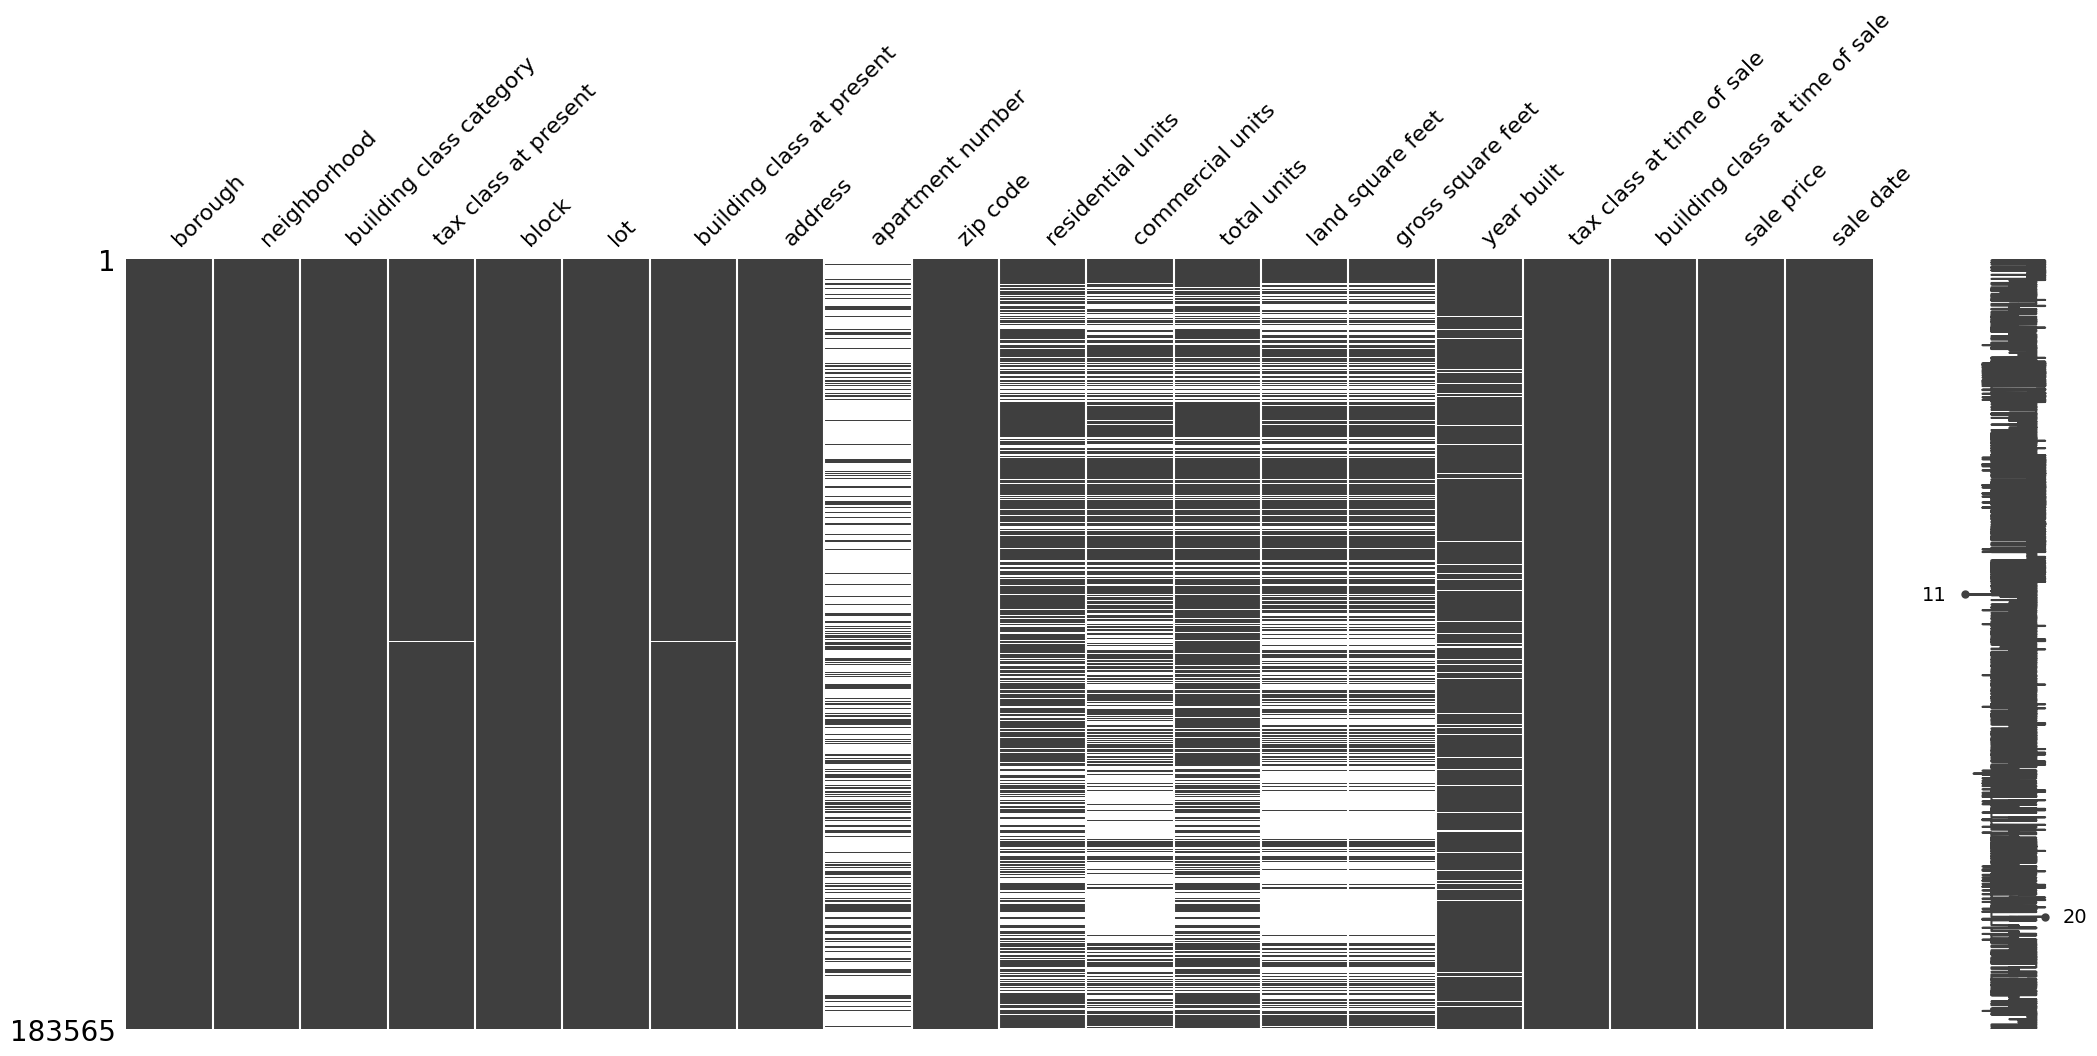

In [1245]:
msno.matrix(df)

In [1246]:
df.describe()

,borough,block,lot,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,sale price
count,183565.000000,183565.000000,183565.000000,183558.000000,131816.000000,101649.000000,136536.000000,9.692900e+04,9.692900e+04,170896.000000,183565.000000,1.835650e+05
mean,2.898091,3964.352943,433.187961,10806.940684,3.374302,0.367451,3.530864,7.429842e+03,6.554127e+03,1954.799738,1.705053,2.085082e+06
std,1.333976,3534.777471,685.986389,574.988253,25.331546,6.147897,25.468149,1.440880e+05,5.904577e+04,36.948649,0.768768,1.240549e+07
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,1.000000e+00
25%,1.000000,1171.000000,23.000000,10128.000000,1.000000,0.000000,1.000000,1.830000e+03,1.164000e+03,1925.000000,1.000000,4.950000e+05
50%,3.000000,2794.000000,55.000000,11204.000000,1.000000,0.000000,1.000000,2.499000e+03,1.700000e+03,1950.000000,2.000000,7.750000e+05
75%,4.000000,5926.000000,1016.000000,11354.000000,2.000000,0.000000,2.000000,3.931000e+03,2.532000e+03,1985.000000,2.000000,1.315000e+06
max,5.000000,16350.000000,9116.000000,11697.000000,899.000000,436.000000,899.000000,7.649136e+06,8.942176e+06,2022.000000,4.000000,1.033000e+09


### Type casting

In [1247]:


# Typecasting categorical columns to 'category' type
df['borough'] = df['borough'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['building class category'] = df['building class category'].astype('category')
df['tax class at present'] = df['tax class at present'].astype('category')
df['building class at present'] = df['building class at present'].astype('category')
df['tax class at time of sale'] = df['tax class at time of sale'].astype('category')
df['building class at time of sale'] = df['building class at time of sale'].astype('category')

# Typecasting block and lot to string (to preserve leading zeros if applicable)
df['block'] = df['block'].astype(str)
df['lot'] = df['lot'].astype(str)

# Typecasting address and apartment number to string
df['address'] = df['address'].astype(str)
df['apartment number'] = df['apartment number'].astype(str)

# Typecasting zip code to string (to preserve leading zeros)
df['zip code'] = df['zip code'].astype(str)

# Typecasting numerical columns to float (or int if appropriate)
df['residential units'] = df['residential units'].astype(float)  # or int if there are no decimals
df['commercial units'] = df['commercial units'].astype(float)    # or int
df['total units'] = df['total units'].astype(float)              # or int

# Typecasting land square feet and gross square feet to float
df['land square feet'] = df['land square feet'].astype(float)
df['gross square feet'] = df['gross square feet'].astype(float)

# Typecasting year built to integer
df['year built'] = df['year built'].astype(float)

# Cleaning sale price and converting to float
df['sale price'] = df['sale price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Converting sale date to datetime format
df['sale date'] = pd.to_datetime(df['sale date'], errors='coerce')

# Convert 'land square feet' and 'gross square feet' from square feet to square meters
df['land square meters'] = df['land square feet'] * 0.092903
df['gross square meters'] = df['gross square feet'] * 0.092903


# Check the data types of the DataFrame to ensure correct typecasting
print(df.dtypes)



borough                                 category
neighborhood                            category
building class category                 category
tax class at present                    category
block                                     object
lot                                       object
building class at present               category
address                                   object
apartment number                          object
zip code                                  object
residential units                        float64
commercial units                         float64
total units                              float64
land square feet                         float64
gross square feet                        float64
year built                               float64
tax class at time of sale               category
building class at time of sale          category
sale price                               float64
sale date                         datetime64[ns]
land square meters  

In [1248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183565 entries, 1 to 258461
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   borough                         183565 non-null  category      
 1   neighborhood                    183565 non-null  category      
 2   building class category         183565 non-null  category      
 3   tax class at present            183253 non-null  category      
 4   block                           183565 non-null  object        
 5   lot                             183565 non-null  object        
 6   building class at present       183253 non-null  category      
 7   address                         183565 non-null  object        
 8   apartment number                183565 non-null  object        
 9   zip code                        183565 non-null  object        
 10  residential units               131816 non-null  float64     

In [1249]:
df = df.drop(columns=['land square feet', 'gross square feet'])

# Display the updated DataFrame to confirm the columns are dropped
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,apartment number,zip code,residential units,commercial units,total units,year built,tax class at time of sale,building class at time of sale,sale price,sale date,land square meters,gross square meters
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,nan,10312.0,1.0,0.0,1.0,1998.0,1,A1,315000.0,2020-10-02,743.224000,340.024980
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,nan,10312.0,1.0,0.0,1.0,1975.0,1,A1,450000.0,2020-06-24,575.998600,239.689740
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,nan,10312.0,1.0,0.0,1.0,1925.0,1,A2,525000.0,2020-07-02,232.257500,113.527466
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,nan,10312.0,1.0,0.0,1.0,1986.0,1,A5,480000.0,2020-01-14,171.406035,172.242162
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,nan,10312.0,1.0,0.0,1.0,2004.0,1,A1,720000.0,2020-10-15,370.590067,213.676900


In [1250]:
df.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'building class at present',
       'address', 'apartment number', 'zip code', 'residential units',
       'commercial units', 'total units', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date', 'land square meters', 'gross square meters'],
      dtype='object')

In [1251]:
# Extract year and month from 'sale date'
df['year_sale'] = df['sale date'].dt.year
df['month_sale'] = df['sale date'].dt.month

# Drop the original 'sale date' column
df = df.drop(columns=['sale date'])

In [1252]:
df.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'building class at present',
       'address', 'apartment number', 'zip code', 'residential units',
       'commercial units', 'total units', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'land square meters', 'gross square meters', 'year_sale',
       'month_sale'],
      dtype='object')

In [1253]:
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,apartment number,zip code,...,commercial units,total units,year built,tax class at time of sale,building class at time of sale,sale price,land square meters,gross square meters,year_sale,month_sale
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,nan,10312.0,...,0.0,1.0,1998.0,1,A1,315000.0,743.224000,340.024980,2020,10
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,nan,10312.0,...,0.0,1.0,1975.0,1,A1,450000.0,575.998600,239.689740,2020,6
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,nan,10312.0,...,0.0,1.0,1925.0,1,A2,525000.0,232.257500,113.527466,2020,7
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,nan,10312.0,...,0.0,1.0,1986.0,1,A5,480000.0,171.406035,172.242162,2020,1
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,nan,10312.0,...,0.0,1.0,2004.0,1,A1,720000.0,370.590067,213.676900,2020,10


In [1254]:
df.dtypes

,0
borough,category
neighborhood,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
zip code,object


In [1255]:
df['year_sale'] = df['year_sale'].astype('category')
df['month_sale'] = df['month_sale'].astype('category')

In [1256]:
df.dtypes

,0
borough,category
neighborhood,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
zip code,object


In [1257]:
df['year built'].unique()

array([1998., 1975., 1925., 1986., 2004., 2000., 2005., 1994., 2003.,
       1930., 1945., 1935., 1940., 1960., 1970., 1978., 1965., 2012.,
       1992., 1983., 1955., 1985., 1980., 2019., 1988., 1995., 1959.,
       2018., 2007., 2017., 1997., 1987.,   nan, 1931., 2014., 2013.,
       2002., 2011., 1996., 2001., 1999., 1991., 1989., 1990., 1993.,
       1950., 1973., 1982., 1981., 1984., 1979., 1899., 1920., 1901.,
       1910., 1962., 1964., 2015., 2006., 1915., 1905., 1974., 2010.,
       1977., 1952., 1963., 1951., 2009., 1948., 2016., 1936., 1956.,
       1933., 1966., 1967., 2020., 1932., 1969., 1972., 1957., 1961.,
       1976., 1968., 2008., 1947., 1943., 1860., 1911., 1900., 1921.,
       1971., 1944., 1890., 1800., 1896., 1917., 1928., 1923., 1927.,
       1937., 1845., 1924., 2021., 2022., 1939., 1929., 1913., 1870.,
       1954., 1880., 1926., 1916., 1922., 1906., 1958., 1914., 1949.,
       1938., 1946., 1953., 1934., 1919., 1941., 1907., 1942., 1918.,
       1881., 1891.,

In [1258]:
df['year built'].min(),df['year built'].max()

(220.0, 2022.0)

In [1259]:
# Define the intervals and corresponding categories
def categorize_year_built(year):
    if year < 1900:
        return 'old'
    elif 1900 <= year < 2000:
        return 'medium'
    elif 2000 <= year <= 2025:
        return 'modern'
    else:
        return 'NaN'  # Handle years outside the defined ranges

# Apply the function to create the new category column
df['year_built_category'] = df['year built'].apply(categorize_year_built)

In [1260]:
df['year_built_category'].unique()

array(['medium', 'modern', 'NaN', 'old'], dtype=object)

In [1261]:
# Assuming the code you provided is already executed and df is defined.

df = df.drop(columns=['year built'])

# Display the updated DataFrame to confirm the column is dropped
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,apartment number,zip code,...,commercial units,total units,tax class at time of sale,building class at time of sale,sale price,land square meters,gross square meters,year_sale,month_sale,year_built_category
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,nan,10312.0,...,0.0,1.0,1,A1,315000.0,743.224000,340.024980,2020,10,medium
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,nan,10312.0,...,0.0,1.0,1,A1,450000.0,575.998600,239.689740,2020,6,medium
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,nan,10312.0,...,0.0,1.0,1,A2,525000.0,232.257500,113.527466,2020,7,medium
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,nan,10312.0,...,0.0,1.0,1,A5,480000.0,171.406035,172.242162,2020,1,medium
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,nan,10312.0,...,0.0,1.0,1,A1,720000.0,370.590067,213.676900,2020,10,modern


In [1262]:
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,apartment number,zip code,...,commercial units,total units,tax class at time of sale,building class at time of sale,sale price,land square meters,gross square meters,year_sale,month_sale,year_built_category
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,nan,10312.0,...,0.0,1.0,1,A1,315000.0,743.224000,340.024980,2020,10,medium
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,nan,10312.0,...,0.0,1.0,1,A1,450000.0,575.998600,239.689740,2020,6,medium
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,nan,10312.0,...,0.0,1.0,1,A2,525000.0,232.257500,113.527466,2020,7,medium
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,nan,10312.0,...,0.0,1.0,1,A5,480000.0,171.406035,172.242162,2020,1,medium
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,nan,10312.0,...,0.0,1.0,1,A1,720000.0,370.590067,213.676900,2020,10,modern


In [1263]:
df.dtypes

,0
borough,category
neighborhood,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
zip code,object


In [1264]:
df['building class at time of sale'].unique()

['A1', 'A2', 'A5', 'A3', 'A0', ..., 'P8', 'J8', 'Y8', 'V6', 'K8']
Length: 169
Categories (169, object): ['A0', 'A1', 'A2', 'A3', ..., 'Z4', 'Z5', 'Z7', 'Z9']

In [1265]:
# Function to categorize building classes
def categorize_building_class(building_class):
    # Extract the first letter and number
    prefix = building_class[0]
    try:
      number = int(building_class[1:])
    except ValueError: # handle cases where the second character onwards is not a number
      return building_class # Return as it is in such cases

    return prefix  # Return only the first letter

# Apply the function to create the new category column
df['building_class_category'] = df['building class at time of sale'].apply(categorize_building_class)

# Now, 'building_class_category' column contains the simplified categories
print(df['building_class_category'].unique())

['A' 'B' 'V' 'K' 'S' 'R' 'C' 'D' 'F' 'O' 'G' 'P' 'M' 'H' 'W' 'RB' 'E' 'I'
 'Z' 'N' 'RP' 'RG' 'RK' 'RS' 'RT' 'RW' 'Q' 'RR' 'GW' 'RA' 'GU' 'RH' 'HB'
 'J' 'HR' 'T' 'Y' 'HS']


In [1266]:
df = df.drop(columns=['building class at time of sale'])

In [1267]:
df['neighborhood'].unique()

['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'ARROCHAR-SHORE ACRES', 'BLOOMFIELD', ..., 'WILLIAMSBURG-SOUTH', 'WINDSOR TERRACE', 'WYCKOFF HEIGHTS', 'AIRPORT JFK', 'CO-OP CITY']
Length: 254
Categories (254, object): ['AIRPORT JFK', 'AIRPORT LA GUARDIA', 'ALPHABET CITY', 'ANNADALE', ...,
                           'WOODLAWN', 'WOODROW', 'WOODSIDE', 'WYCKOFF HEIGHTS']

In [1268]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame and 'neighborhood' is the column you want to group
# First, you need to encode 'neighborhood' as numeric if it's not already
df['neighborhood_encoded'] = df['neighborhood'].astype('category').cat.codes

# Use K-means clustering
kmeans = KMeans(n_clusters=20)  # Use 20 clusters as requested
df['neighborhood_cluster'] = kmeans.fit_predict(df[['neighborhood_encoded']])

# Now 'neighborhood_cluster' contains the cluster labels for each neighborhood
print(df['neighborhood_cluster'].value_counts())

neighborhood_cluster
3     20803
0     15034
2     14857
11    11904
9     11202
8      9829
4      9649
10     9391
1      8728
15     8226
19     8171
13     8010
17     7956
12     7499
16     6561
7      6143
18     5787
14     4806
6      4619
5      4390
Name: count, dtype: int64


In [1269]:
# Optionally drop original neighborhood column
df = df.drop(columns=['neighborhood'])

In [1270]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
zip code,object
residential units,float64


In [1271]:
df['building class category'].unique()

['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '05 TAX CLASS 1 VACANT LAND', '22 STORE BUILDINGS', '04 TAX CLASS 1 CONDOS', ..., '25 LUXURY HOTELS', '45 CONDO HOTELS', '34 THEATRES', '39 TRANSPORTATION FACILITIES', '40 SELECTED GOVERNMENTAL FACILITIES']
Length: 44
Categories (44, object): ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS',
                          '04 TAX CLASS 1 CONDOS', ..., '46 CONDO STORE BUILDINGS',
                          '47 CONDO NON-BUSINESS STORAGE', '48 CONDO TERRACES/GARDENS/CABANAS',
                          '49 CONDO WAREHOUSES/FACTORY/INDUS']

In [1272]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
zip code,object
residential units,float64


In [1273]:
df['zip code'].nunique()

193

In [1274]:
# Assuming df is your DataFrame and 'zip code' is the column you want to group
# First, you need to encode 'zip code' as numeric if it's not already.  Since it's a string, we'll use Label Encoding.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['zip_code_encoded'] = le.fit_transform(df['zip code'])

# Use K-means clustering
kmeans = KMeans(n_clusters=20)  # Use 20 clusters as requested
df['zip_code_cluster'] = kmeans.fit_predict(df[['zip_code_encoded']])

# Now 'zip_code_cluster' contains the cluster labels for each zip code
print(df['zip_code_cluster'].value_counts())



zip_code_cluster
3     17476
0     13000
8     12797
12    12086
13    11921
9     11757
16    11307
6     10923
7     10835
2     10173
15     8989
18     8122
11     7250
5      6533
4      6248
1      6075
17     5759
19     5079
14     4268
10     2967
Name: count, dtype: int64


In [1275]:
# Optionally drop original zip code column if needed
df = df.drop(columns=['zip code'])

In [1276]:
# Function to categorize building classes
def categorize_building_class(building_class):
    # Extract the first letter and number
    prefix = building_class[0]
    try:
      number = int(building_class[1:])
    except ValueError: # handle cases where the second character onwards is not a number
      return building_class # Return as it is in such cases

    return prefix  # Return only the first letter

# Apply the function to create the new category column
df['building_class_category_present'] = df['building class at present'].apply(categorize_building_class)

# Now, 'building_class_category' column contains the simplified categories
print(df['building_class_category_present'].unique())

['A' 'B' 'V' 'K' 'S' 'R' 'C' 'D' 'F' 'O' 'G' 'P' 'M' 'H' 'W' 'RB' 'E' 'I'
 'Z' 'N' 'RP' 'RG' 'RK' 'RS' 'RT' 'RW' 'Q' 'RR' 'GW' nan 'RA' 'GU' 'RH'
 'HB' 'J' 'HR' 'Y' 'T' 'HS']


In [1277]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
residential units,float64
commercial units,float64


In [1278]:
df['building_class_category_sale']=df['building_class_category']

In [1279]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
residential units,float64
commercial units,float64


In [1280]:
# Convert 'neighborhood_cluster' to categorical
df['neighborhood_cluster'] = df['neighborhood_cluster'].astype('category')

# Convert 'zip_code_cluster' to categorical
df['zip_code_cluster'] = df['zip_code_cluster'].astype('category')

df.dtypes

,0
borough,category
building class category,category
tax class at present,category
block,object
lot,object
building class at present,category
address,object
apartment number,object
residential units,float64
commercial units,float64


In [1281]:
from scipy.stats import f_oneway

# ANOVA Test for categorical features
def anova_test(df, categorical_columns, target):
    for col in categorical_columns:
        groups = [group[target].dropna() for name, group in df.groupby(col)]
        stat, p_value = f_oneway(*groups)
        print(f"ANOVA for {col}: F-Statistic = {stat:.4f}, P-Value = {p_value:.4e}")

categorical_columns_1 = ['borough', 'tax class at present', 'building class at present', 'tax class at time of sale', 'year_sale', 'month_sale', 'year_built_category', 'building_class_category', 'building_class_category_present', 'building_class_category_sale', 'neighborhood_cluster', 'zip_code_cluster','address'
,'lot','block','apartment number']
anova_test(df, categorical_columns_1, 'sale price')

<ipython-input-1281-1c3d6386e798>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].dropna() for name, group in df.groupby(col)]


ANOVA for borough: F-Statistic = 358.9745, P-Value = 1.8416e-308
ANOVA for tax class at present: F-Statistic = 448.5152, P-Value = 0.0000e+00
ANOVA for building class at present: F-Statistic = 260.3620, P-Value = 0.0000e+00
ANOVA for tax class at time of sale: F-Statistic = 1974.9980, P-Value = 0.0000e+00
ANOVA for year_sale: F-Statistic = 21.7003, P-Value = 3.7738e-10
ANOVA for month_sale: F-Statistic = 13.2879, P-Value = 9.2644e-26
ANOVA for year_built_category: F-Statistic = 195.4335, P-Value = 1.4975e-126
ANOVA for building_class_category: F-Statistic = 566.5721, P-Value = 0.0000e+00
ANOVA for building_class_category_present: F-Statistic = 567.4114, P-Value = 0.0000e+00
ANOVA for building_class_category_sale: F-Statistic = 566.5721, P-Value = 0.0000e+00
ANOVA for neighborhood_cluster: F-Statistic = 48.7625, P-Value = 7.8358e-184


<ipython-input-1281-1c3d6386e798>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].dropna() for name, group in df.groupby(col)]


ANOVA for zip_code_cluster: F-Statistic = 117.1026, P-Value = 0.0000e+00
ANOVA for address: F-Statistic = 2.4939, P-Value = 0.0000e+00
ANOVA for lot: F-Statistic = 1.3887, P-Value = 4.7795e-49
ANOVA for block: F-Statistic = 3.7198, P-Value = 0.0000e+00
ANOVA for apartment number: F-Statistic = 5.7479, P-Value = 0.0000e+00


In [1282]:
df = df.drop(columns=['neighborhood_encoded', 'zip_code_encoded', 'building_class_category', 'address', 'apartment number', 'block', 'lot'])

In [1283]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
building class at present,category
residential units,float64
commercial units,float64
total units,float64
tax class at time of sale,category
sale price,float64
land square meters,float64


### find relations between features

### split data to target & features

In [1284]:
numerical_columns=df.select_dtypes(['int','float']).columns

In [1285]:
numerical_columns

Index(['residential units', 'commercial units', 'total units', 'sale price',
       'land square meters', 'gross square meters'],
      dtype='object')

In [1286]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df[numerical_columns].apply(zscore)

# Define a threshold (e.g., |z| > 3 is an outlier)
outliers = (z_scores.abs() > 5).any(axis=1)
df = df[~outliers]

print(f"Removed {outliers.sum()} outliers")



Removed 595 outliers


In [1287]:
# Calculate IQR for numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Shape of DataFrame after IQR outlier removal: {df.shape}")

Shape of DataFrame after IQR outlier removal: (71844, 18)


In [1288]:
df['commercial units'].unique()

array([0.])

In [1289]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
building class at present,category
residential units,float64
commercial units,float64
total units,float64
tax class at time of sale,category
sale price,float64
land square meters,float64


In [1290]:
df['commercial units'].unique()

array([0.])

In [1291]:
# Assuming 'df' is your original DataFrame with all features
numerical_columns = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Print the entire correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# List highly correlated pairs (correlation > 0.8)
high_correlation_pairs = []
# Loop through each combination of columns and rows in the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid duplicate pairs and self-correlation
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Consider absolute value for negative correlations
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_correlation_pairs.append((feature1, feature2, correlation_matrix.iloc[i, j]))

# Print the highly correlated pairs
print("\nHighly Correlated Pairs (Correlation > 0.8):")
for pair in high_correlation_pairs:
    print(f"Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]}")

Correlation Matrix:
                     residential units  commercial units  total units  \
residential units             1.000000               NaN     1.000000   
commercial units                   NaN               NaN          NaN   
total units                   1.000000               NaN     1.000000   
sale price                    0.240761               NaN     0.240761   
land square meters            0.076538               NaN     0.076538   
gross square meters           0.662520               NaN     0.662520   

                     sale price  land square meters  gross square meters  
residential units      0.240761            0.076538             0.662520  
commercial units            NaN                 NaN                  NaN  
total units            0.240761            0.076538             0.662520  
sale price             1.000000            0.053423             0.247675  
land square meters     0.053423            1.000000             0.443945  
gross square meter

In [1292]:
df = df.drop(columns=['total units'], axis=1)

# Display the updated DataFrame to confirm the columns are dropped
df.head()

,borough,building class category,tax class at present,building class at present,residential units,commercial units,tax class at time of sale,sale price,land square meters,gross square meters,year_sale,month_sale,year_built_category,neighborhood_cluster,zip_code_cluster,building_class_category_present,building_class_category_sale
2,5,01 ONE FAMILY DWELLINGS,1,A1,1.0,0.0,1,450000.0,575.998600,239.689740,2020,6,medium,0,6,A,A
3,5,01 ONE FAMILY DWELLINGS,1,A1,1.0,0.0,1,525000.0,232.257500,113.527466,2020,7,medium,0,6,A,A
4,5,01 ONE FAMILY DWELLINGS,1,A5,1.0,0.0,1,480000.0,171.406035,172.242162,2020,1,medium,0,6,A,A
5,5,01 ONE FAMILY DWELLINGS,1,A1,1.0,0.0,1,720000.0,370.590067,213.676900,2020,10,modern,0,6,A,A
8,5,01 ONE FAMILY DWELLINGS,1,A5,1.0,0.0,1,429000.0,136.660313,108.882316,2020,11,medium,0,6,A,A


In [1293]:
df.columns

Index(['borough', 'building class category', 'tax class at present',
       'building class at present', 'residential units', 'commercial units',
       'tax class at time of sale', 'sale price', 'land square meters',
       'gross square meters', 'year_sale', 'month_sale', 'year_built_category',
       'neighborhood_cluster', 'zip_code_cluster',
       'building_class_category_present', 'building_class_category_sale'],
      dtype='object')

In [1294]:
x=df.drop(['sale price'],axis=1)
y=df['sale price']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2024)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=2024)

In [1295]:
numerical_columns_1=x.select_dtypes(['int','float']).columns
categorical_columns_1=x.select_dtypes(['object','category']).columns

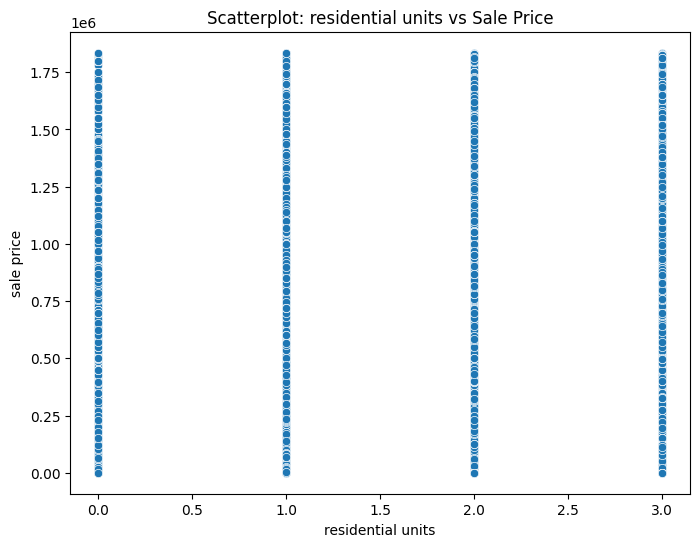

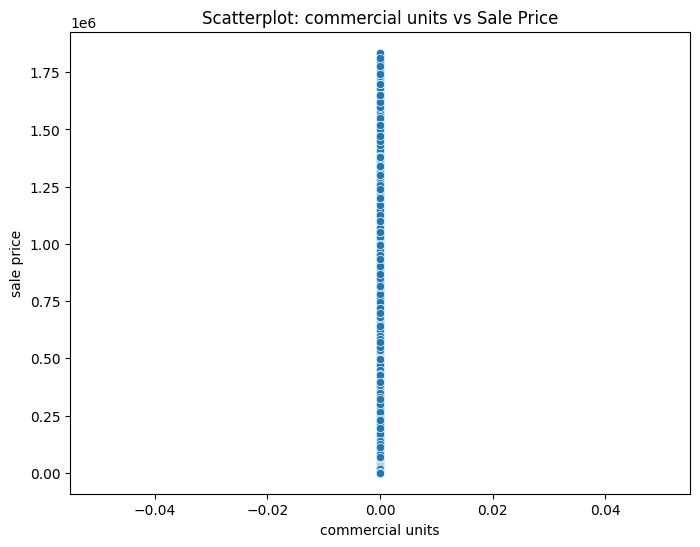

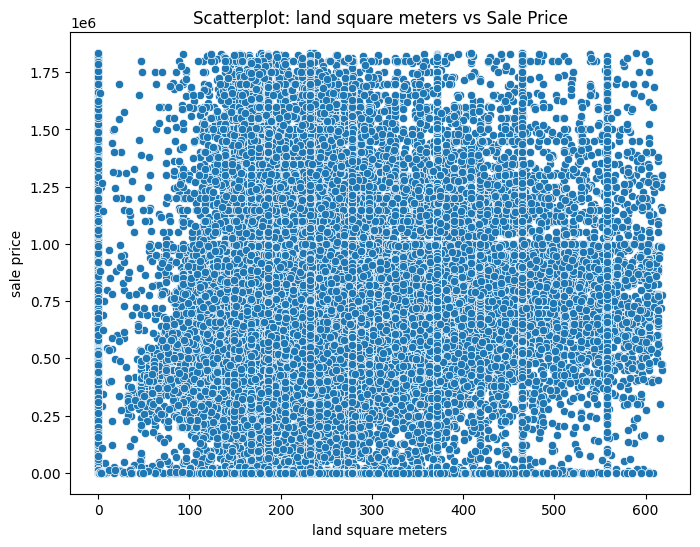

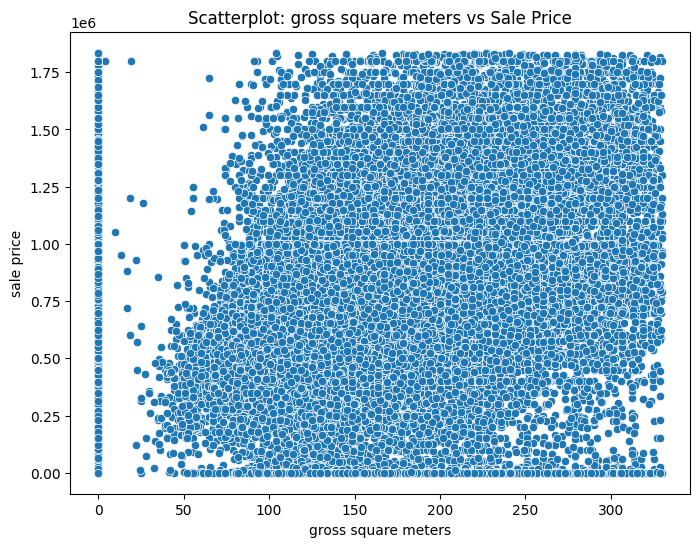

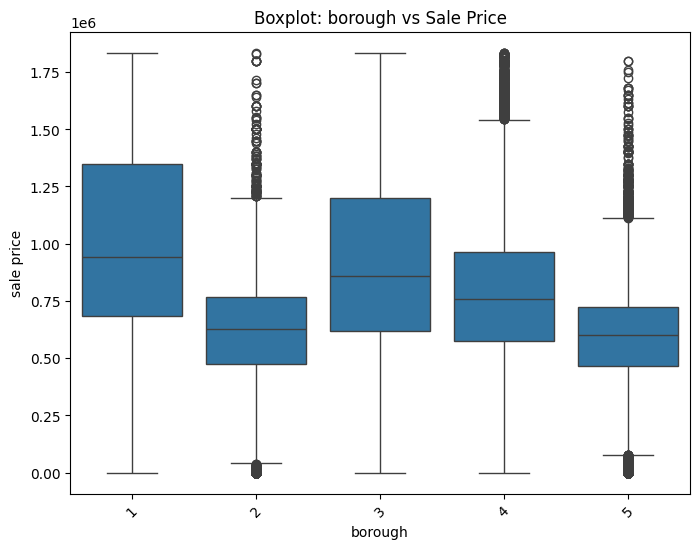

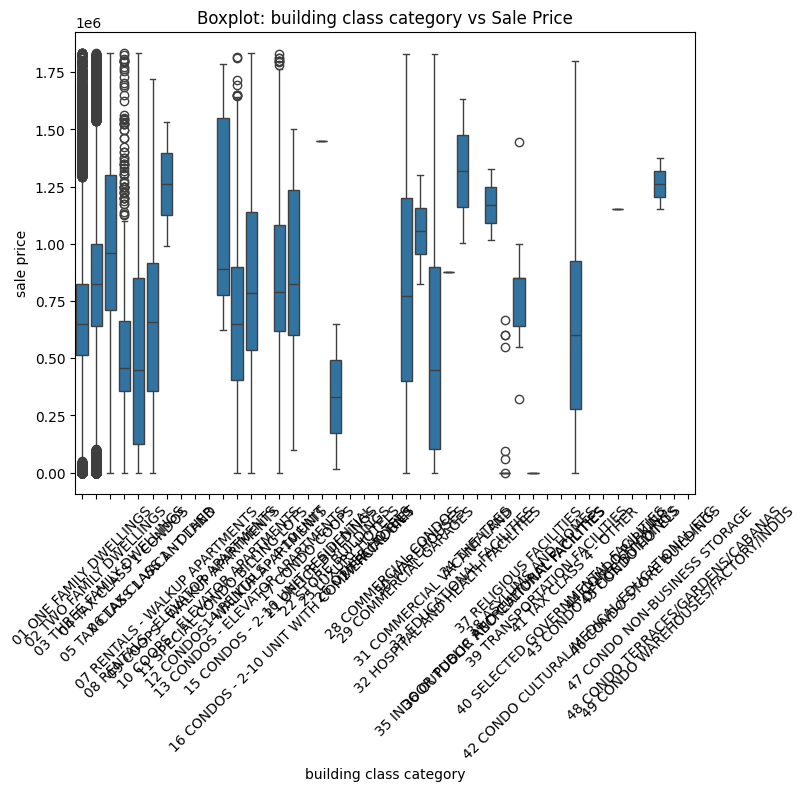

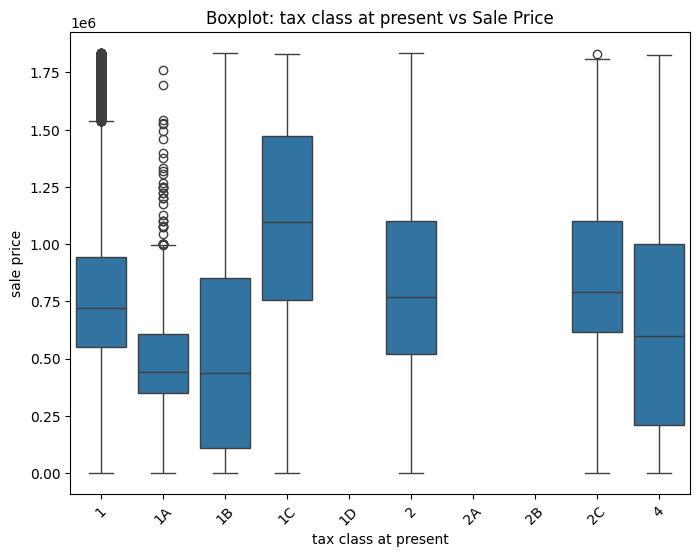

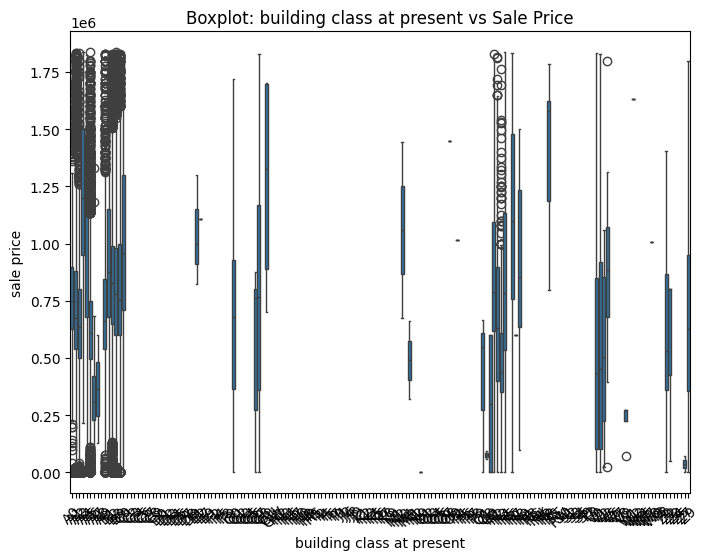

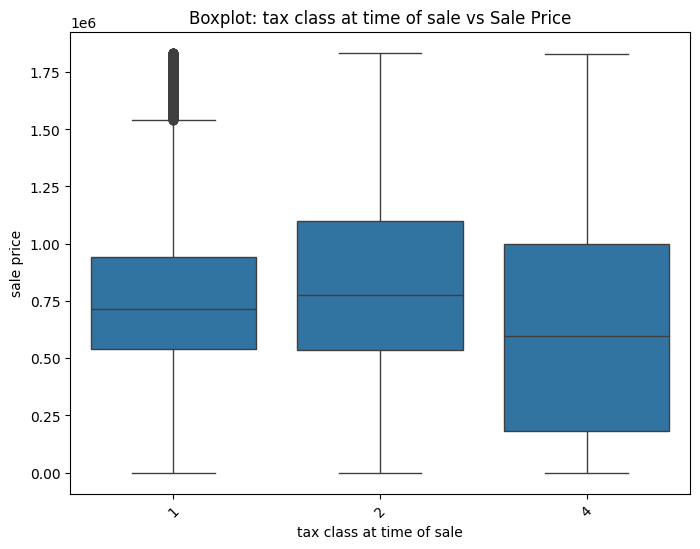

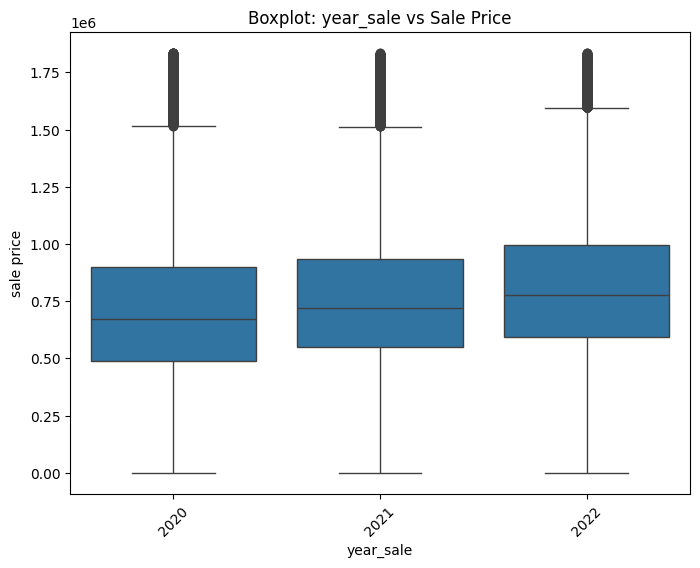

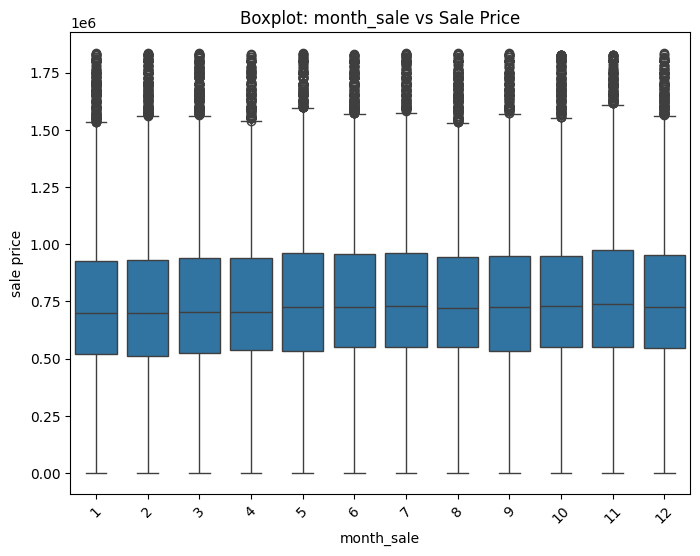

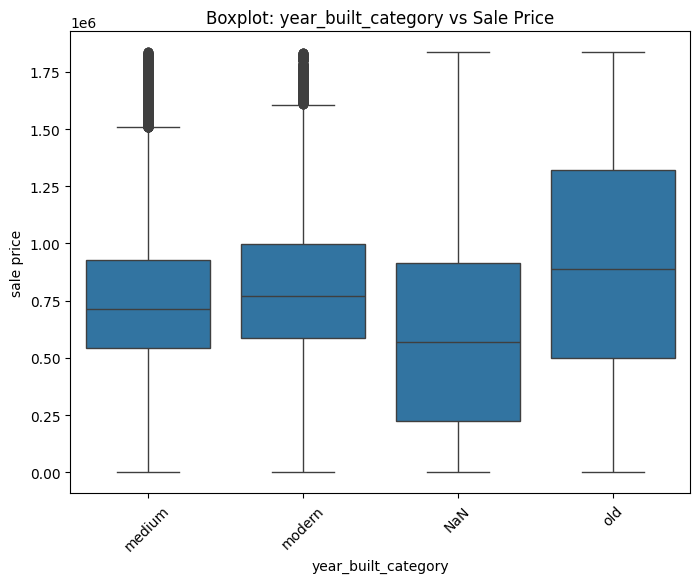

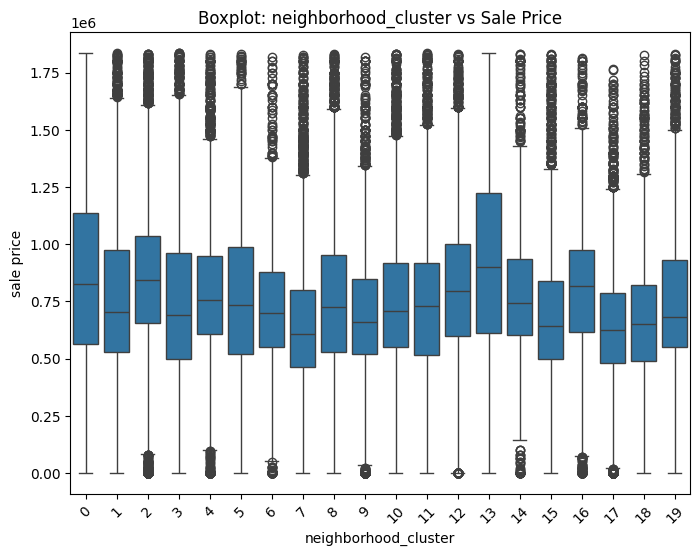

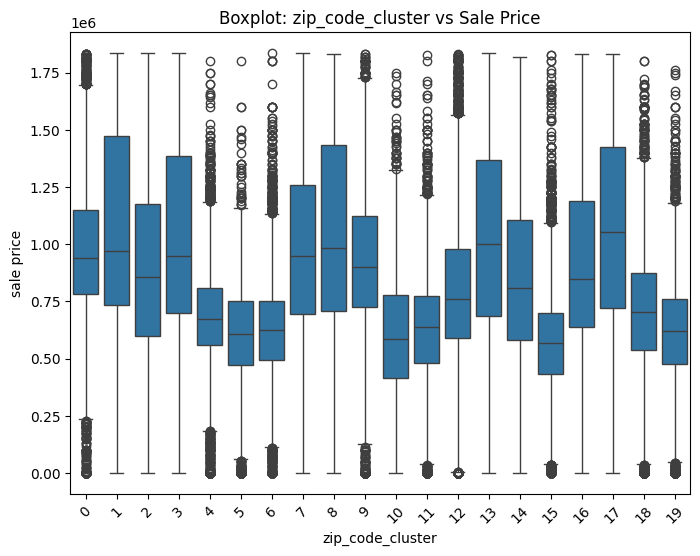

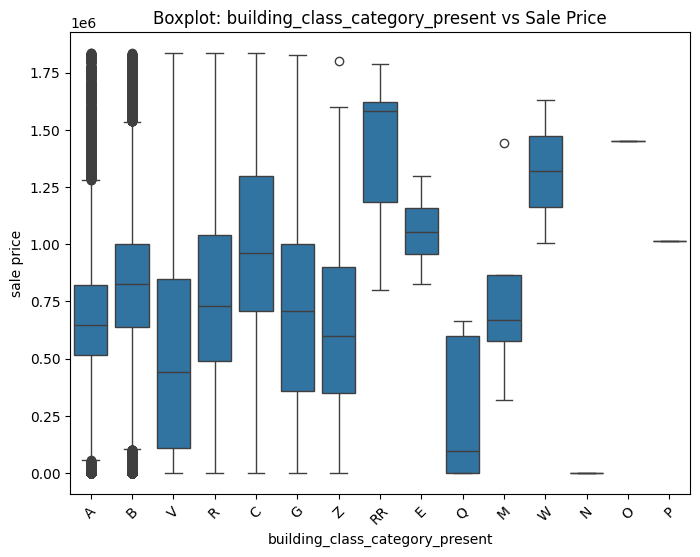

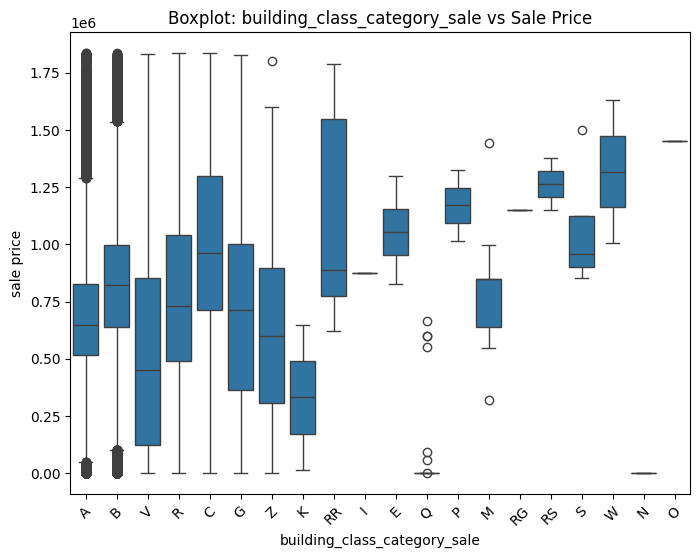

In [1296]:
# Numerical features
for col in numerical_columns_1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['sale price'])
    plt.title(f"Scatterplot: {col} vs Sale Price")
    plt.show()

# Categorical features

for col in categorical_columns_1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], y=df['sale price'])
    plt.title(f"Boxplot: {col} vs Sale Price")
    plt.xticks(rotation=45)
    plt.show()


In [1297]:
df.dtypes

,0
borough,category
building class category,category
tax class at present,category
building class at present,category
residential units,float64
commercial units,float64
tax class at time of sale,category
sale price,float64
land square meters,float64
gross square meters,float64


In [1298]:
# Assuming the code you provided is already executed and df is defined.
df = df.drop(columns=['building class at present'])

# Display the updated DataFrame to confirm the column is dropped
df.head()

,borough,building class category,tax class at present,residential units,commercial units,tax class at time of sale,sale price,land square meters,gross square meters,year_sale,month_sale,year_built_category,neighborhood_cluster,zip_code_cluster,building_class_category_present,building_class_category_sale
2,5,01 ONE FAMILY DWELLINGS,1,1.0,0.0,1,450000.0,575.998600,239.689740,2020,6,medium,0,6,A,A
3,5,01 ONE FAMILY DWELLINGS,1,1.0,0.0,1,525000.0,232.257500,113.527466,2020,7,medium,0,6,A,A
4,5,01 ONE FAMILY DWELLINGS,1,1.0,0.0,1,480000.0,171.406035,172.242162,2020,1,medium,0,6,A,A
5,5,01 ONE FAMILY DWELLINGS,1,1.0,0.0,1,720000.0,370.590067,213.676900,2020,10,modern,0,6,A,A
8,5,01 ONE FAMILY DWELLINGS,1,1.0,0.0,1,429000.0,136.660313,108.882316,2020,11,medium,0,6,A,A


In [1299]:
x.shape , y.shape

((71844, 16), (71844,))

In [1300]:
numerical_columns=x_train.select_dtypes(['int','float']).columns
categorical_columns=x_train.select_dtypes(['object','category']).columns

In [1301]:
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['residential units', 'commercial units', 'land square meters',
       'gross square meters'],
      dtype='object')
Categorical Columns: Index(['borough', 'building class category', 'tax class at present',
       'building class at present', 'tax class at time of sale', 'year_sale',
       'month_sale', 'year_built_category', 'neighborhood_cluster',
       'zip_code_cluster', 'building_class_category_present',
       'building_class_category_sale'],
      dtype='object')


In [1302]:
df.describe()

,residential units,commercial units,sale price,land square meters,gross square meters
count,71844.000000,71844.0,7.184400e+04,71844.000000,71844.000000
mean,1.424698,0.0,7.553799e+05,237.511067,142.817907
std,0.661925,0.0,3.667719e+05,130.377919,78.356925
min,0.000000,0.0,1.000000e+00,0.000000,0.000000
25%,1.000000,0.0,5.400000e+05,172.056356,106.281032
50%,1.000000,0.0,7.200000e+05,227.194286,142.141590
75%,2.000000,0.0,9.500000e+05,325.160500,193.238240
max,3.000000,0.0,1.835000e+06,617.804950,329.805650


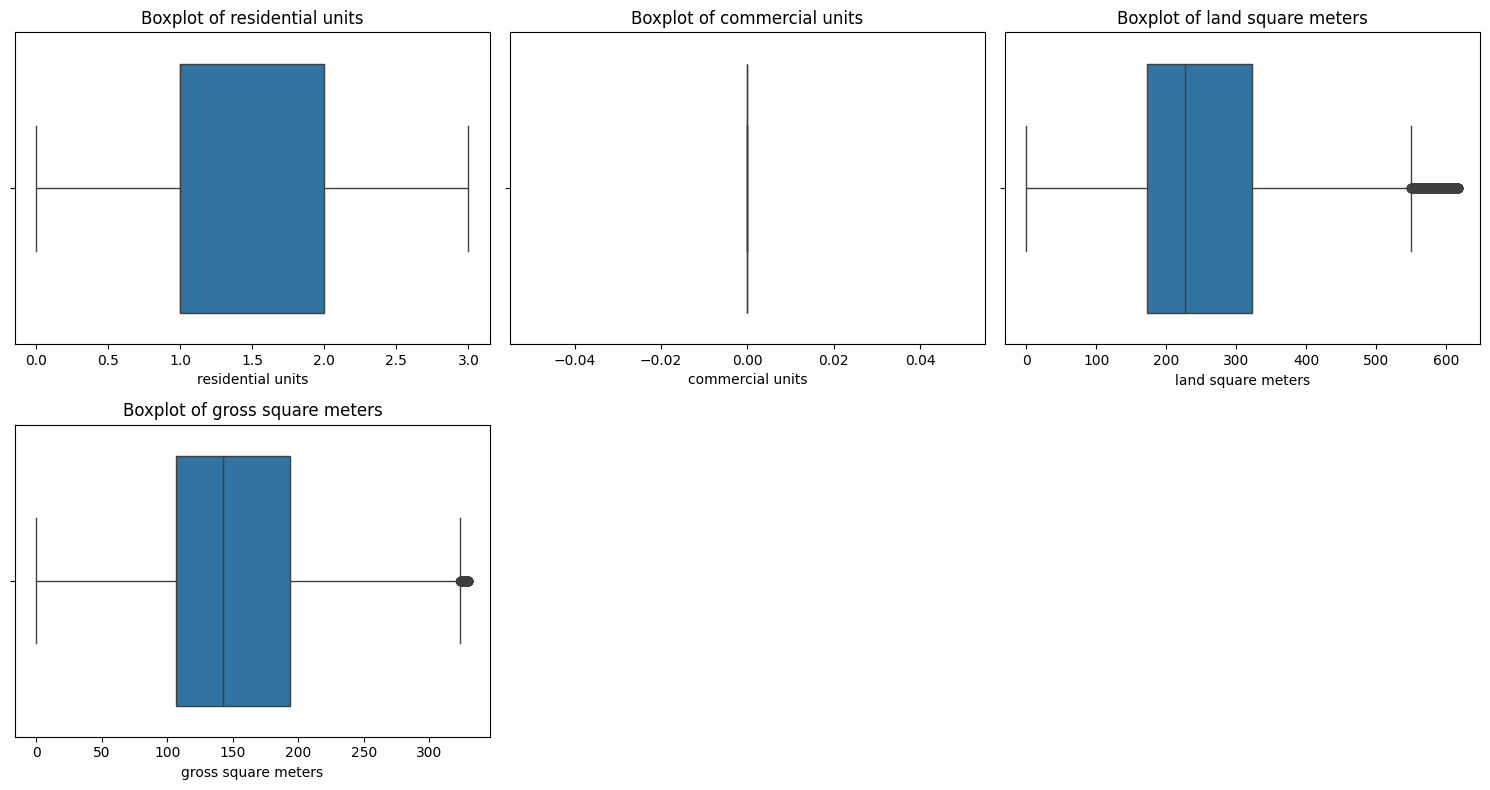

In [1303]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid size based on your data
    sns.boxplot(x=x_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

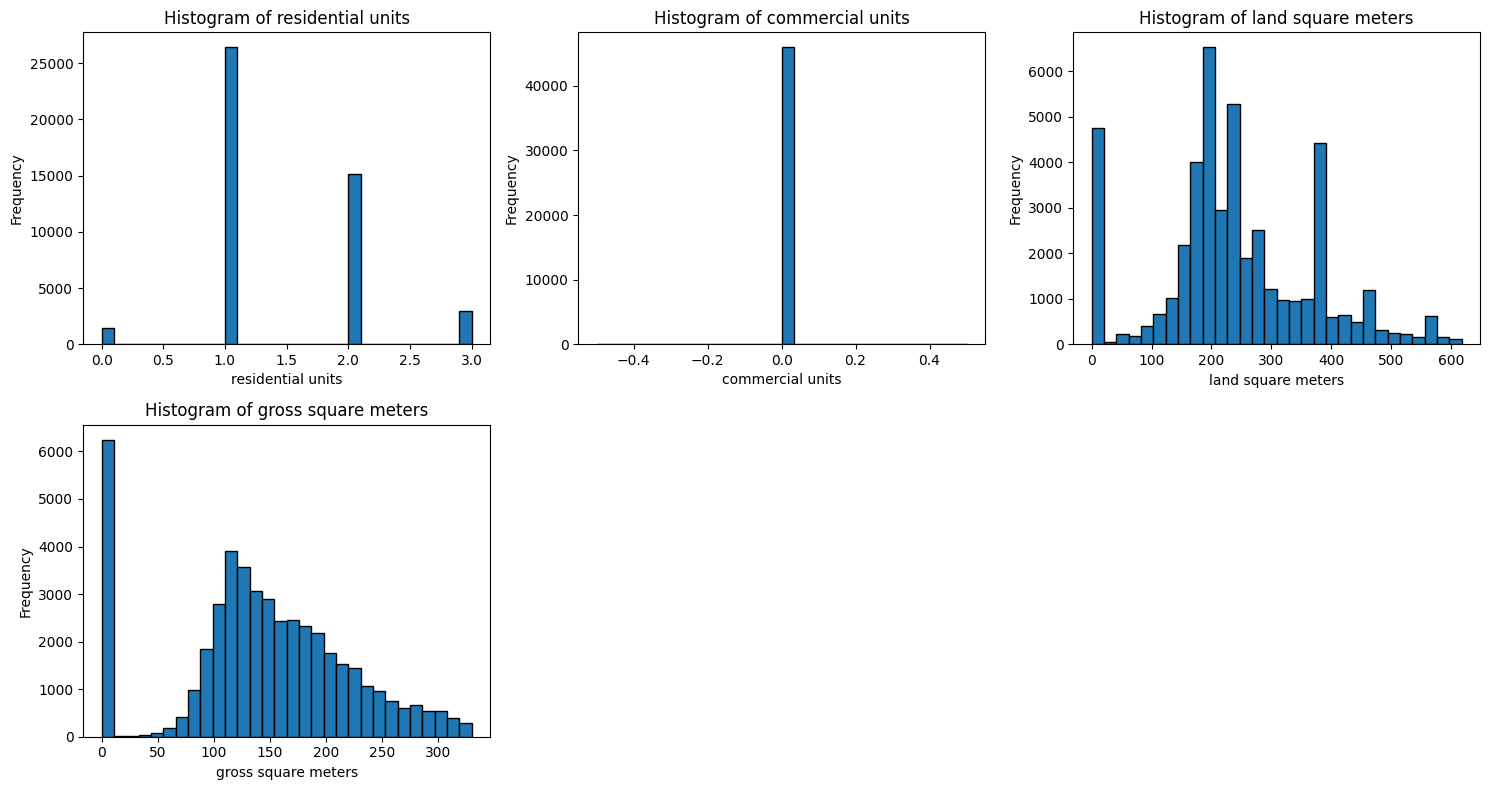

In [1304]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid size based on the number of columns
    plt.hist(x_train[col], bins=30, edgecolor='black')  # 30 bins is a good starting point, adjust as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [1305]:
categorical_columns

Index(['borough', 'building class category', 'tax class at present',
       'building class at present', 'tax class at time of sale', 'year_sale',
       'month_sale', 'year_built_category', 'neighborhood_cluster',
       'zip_code_cluster', 'building_class_category_present',
       'building_class_category_sale'],
      dtype='object')

In [1306]:
numerical_columns

Index(['residential units', 'commercial units', 'land square meters',
       'gross square meters'],
      dtype='object')

In [1307]:
preprocessing=ColumnTransformer(transformers=[
    ('scaling',MinMaxScaler(),numerical_columns),
    ('Encoding',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_columns)
])

pipeline=Pipeline(steps=[
    ('preprocess',preprocessing),
    ('modeling',LinearRegression())
])
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['residential units', 'commercial units', 'land square meters',
       'gross square meters'],
      dtype='object')),
                                                 ('Encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['borough', 'building class category', 'tax class at present',
       'building class at present', 'tax class at time of sale', 'year_sale',
       'month_sale', 'year_built_category', 'neighborhood_cluster',
       'zip_code_cluster', 'building_class_category_present',
       'building_class_category_sale'],
      dtype='object'))])),
                ('modeling', LinearRegression())])

In [1308]:
numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaling',MinMaxScaler())
])
categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

preprocessing=ColumnTransformer(transformers=[
    ('numercial_preprocess',numerical_pipeline,numerical_columns),
    ('categorical_preprocess',categorical_pipeline,categorical_columns)
])

pipeline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',LinearRegression())
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numercial_preprocess',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['residential units', 'commercial units', 'land square meters',
       'gross square meters'],
      dtype='object')),
                                                 ('categorical_preprocess',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequen...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['borough', 'building class category', 'tax class at present',
       'building class at present', 'tax class at time of sale', 'year_sale',
       'month_sale', 'year_built_category', 'neighborhood_cluster',
       'zip_code_cluster', 'building_class_category_present',
       'building_class_category_sale'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [1309]:
pipeline.score(x_train,y_train)

0.335441584545235

In [1310]:
predictions=pipeline.predict(x_val)
r2_score(y_val,predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.32663601883786475

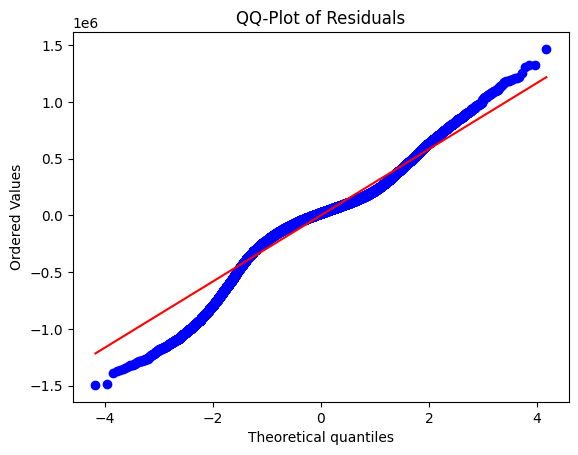

Shapiro-Wilk Test Statistic: 0.9430851742887234, P-Value: 1.4137417018963678e-81
Residuals do not appear to be normally distributed. Consider transformations or alternative models.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45980.
  res = hypotest_fun_out(*samples, **kwds)


In [1311]:
y_pred = pipeline.predict(x_train)
residuals = y_train - y_pred

# 1. QQ-Plot
probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()

# 2. Shapiro-Wilk Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, P-Value: {p}")

if p > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals do not appear to be normally distributed. Consider transformations or alternative models.")

### lr

In [1312]:
# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor()
}

results = {}

for model_name, model in models.items():
    # Create the pipeline
    numerical_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scaling', MinMaxScaler())
    ])
    categorical_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])
    preprocessing = ColumnTransformer(transformers=[
        ('numerical_preprocess', numerical_pipeline, numerical_columns),
        ('categorical_preprocess', categorical_pipeline, categorical_columns)
    ])
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('model', model)  # Use the current model
    ])

    # Fit the pipeline
    pipeline.fit(x_train, y_train)

    # Evaluate the model on the validation set
    predictions = pipeline.predict(x_val)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))

    # Store the results
    results[model_name] = {'r2_score': r2, 'rmse':rmse}

    print(f"{model_name}:")
    print(f"R^2 score: {r2}")
    print(f"RMSE: {rmse}")
    print("-" * 30)

# You can now analyze the results dictionary to compare the performance of different models.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Linear Regression:
R^2 score: 0.32663601883786475
RMSE: 298344.3358889101
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1884952847586568.8, tolerance: 624057041570.3749
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Lasso:
R^2 score: 0.3271669180848574
RMSE: 298226.70113270177
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Ridge:
R^2 score: 0.3269413676433546
RMSE: 298276.68346087536
------------------------------
SGDRegressor:
R^2 score: 0.32201909029495945
RMSE: 299365.3894937977
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [1313]:
predictions=pipeline.predict(x_test)
r2_score(y_test,predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 3, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.3247757809106362